# 根据神经网络，对用户排序

-   用户集
-   顺序无关神经网络（神经网络类型和state_dict）
-   排序后的存储

In [2]:
WORKSPACEFOLDER = 'E:\Projects\ComplexNetwork'
import os
os.chdir(WORKSPACEFOLDER)

In [3]:
import json
import functools

import torch

In [4]:
import config

DB = config.get_DB()

In [5]:
import matplotlib.pyplot as plt

%matplotlib notebook

In [6]:
import src.main.util.sort as sort

In [15]:
import src.main.util.spread as spread

In [12]:
from scipy import sparse

In [20]:
import numpy as np

## SNAPTwitter

### 条件： cn20 nodes20_beta0.0120

#### 识别关键用户

In [7]:
with open(r'db\SNAPTwitter\cn 20.json', 'r') as fr:
    cn20 = json.load(fr)

In [8]:
folder_nn = 'db/SNAPTwitter/nn/order_independent_net'
file_emb = 'db/SNAPTwitter/SNAPTwitter.node2vec.emb.json'
cmp = sort.sort_by_cmp(folder_nn, file_emb)

In [11]:
cn20_sorted = []
for i in range(len(cn20)):
    cn20_sorted.append(sorted(cn20[i], key=functools.cmp_to_key(cmp), reverse=True))

In [14]:
with open(r'db\SNAPTwitter\seed\nn\20 0.0120 20.json',  'w') as fw:
    json.dump(cn20_sorted, fw)

#### calculate spread size

In [13]:
gin_mat = sparse.load_npz(r'db\SNAPTwitter\gin_mat\0.0120.npz').toarray()
gout_size = 2121.119174379556

In [17]:
cn20_ss = []
for i in range(len(cn20_sorted)):
    ss = spread.spread_size(cn20_sorted[i], gin_mat, gout_size)
    cn20_ss.append(ss)

In [36]:
ss = np.array(cn20_ss).mean(axis=0) / gout_size

In [29]:
with open(r'db\SNAPTwitter\img\NN_PGIN-PGIN-MKS.json', 'r') as fr:
    data = json.load(fr)

#### Plot

In [39]:
x = data['x']
y1 = list(ss)
y2 = data['NN_PGIN']
y3 = data['PGIN']
y4 = data['MKS']
y = [y1, y2, y3, y4]
labels = ['OIN_PGIN', 'NN_PGIN', 'PGIN', 'MKS']

In [41]:
for i in range(len(y)):
    ax.plot(x, y[i], label=labels[i])
    ax.legend()
    ax.grid(alpha=0.25)

In [40]:
ax.clear()

<IPython.core.display.Javascript object>


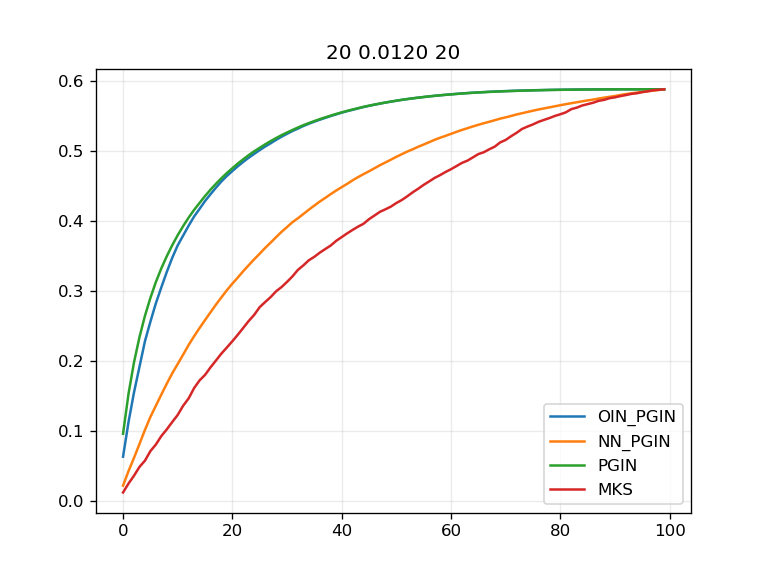

In [34]:
fig, ax = plt.subplots()

In [42]:
ax.set_title('20 0.0120 20')

Text(0.5, 1, '20 0.0120 20')

In [45]:
fig.savefig(r'db\SNAPTwitter\img\OIN_PGIN-NN_PGIN-PGIN-MKS.png')

In [46]:
data['OIN_PGIN'] = y1
with open(r'db\SNAPTwitter\img\OIN_PGIN-NN_PGIN-PGIN-MKS.json', 'w') as fw:
    json.dump(data, fw)